# Task 2

Maxim Pryanikov    
B19-DS-01  
m.pryanikov@innopolis.university  
@m4ximpr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Traveling salesman path

### Dataset

In [2]:
CITIES_PATH = 'data/city.csv'

In [3]:
cities = pd.read_csv(CITIES_PATH)
cities

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,"Ярославская обл, г Ростов",152150.0,Россия,Центральный,обл,Ярославская,р-н,Ростовский,г,Ростов,...,4,1,78410000000,78637101001,7609,UTC+3,57.205132,39.437862,31791,862
1113,"Ярославская обл, г Рыбинск",152900.0,Россия,Центральный,обл,Ярославская,р-н,Рыбинский,г,Рыбинск,...,4,1,78415000000,78715000001,7610,UTC+3,58.048550,38.858412,200771,1071
1114,"Ярославская обл, г Тутаев",152300.0,Россия,Центральный,обл,Ярославская,р-н,Тутаевский,г,Тутаев,...,4,1,78417000000,78643101001,7611,UTC+3,57.867499,39.536963,41001,1200
1115,"Ярославская обл, г Углич",152610.0,Россия,Центральный,обл,Ярославская,р-н,Угличский,г,Углич,...,4,1,78420000000,78646101001,7612,UTC+3,57.522425,38.302004,34505,1148


#### Leave only relevant columns 

In [4]:
cities = cities.loc[:, ['city', 'population', 'geo_lon', 'geo_lat']]
cities.head()

,city,population,geo_lon,geo_lat
0,Адыгейск,12689,39.190289,44.878414
1,Майкоп,144055,40.100661,44.609827
2,Горно-Алтайск,62861,85.960324,51.958103
3,Алейск,28528,82.779361,52.492251
4,Барнаул,635585,83.779806,53.347997


#### Filter out rows without city name

In [5]:
cities['city'].isna().sum()

14

In [6]:
cities = cities[cities['city'].notna()]
cities.shape

(1103, 4)

#### Sort rows by population

In [7]:
N = 30

In [8]:
cities = cities.sort_values(by=['population'], ascending=False, ignore_index=True)[:N]
cities

,city,population,geo_lon,geo_lat
0,Новосибирск,1498921,82.921149,55.028191
1,Екатеринбург,1377738,60.605491,56.838522
2,Нижний Новгород,1250615,44.005391,56.324063
3,Казань,1216965,49.111497,55.794358
4,Самара,1164900,50.106952,53.195031
5,Омск,1154000,73.367452,54.984857
6,Челябинск,1130273,61.400808,55.160262
7,Ростов-на-Дону,1091544,39.718803,47.222457
8,Уфа,1062300,55.957847,54.734944
9,Волгоград,1021244,44.517034,48.707004


### Plot cities

In [9]:
MAX_POPULATION = cities.loc[0, 'population']
MAX_POPULATION

1498921

In [10]:
def compute_marker_size(population: int) -> int:
    return population / MAX_POPULATION * 100

In [11]:
def plot_cities(cities: pd.DataFrame):
    plt.title('Cities')

    for _, city in cities.iterrows():
        x = city['geo_lon']
        y = city['geo_lat']

        plt.scatter(x, y, c='blue', alpha=0.5, s=compute_marker_size(city['population']))
        plt.annotate(city['city'], xy=(x, y), size=7)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

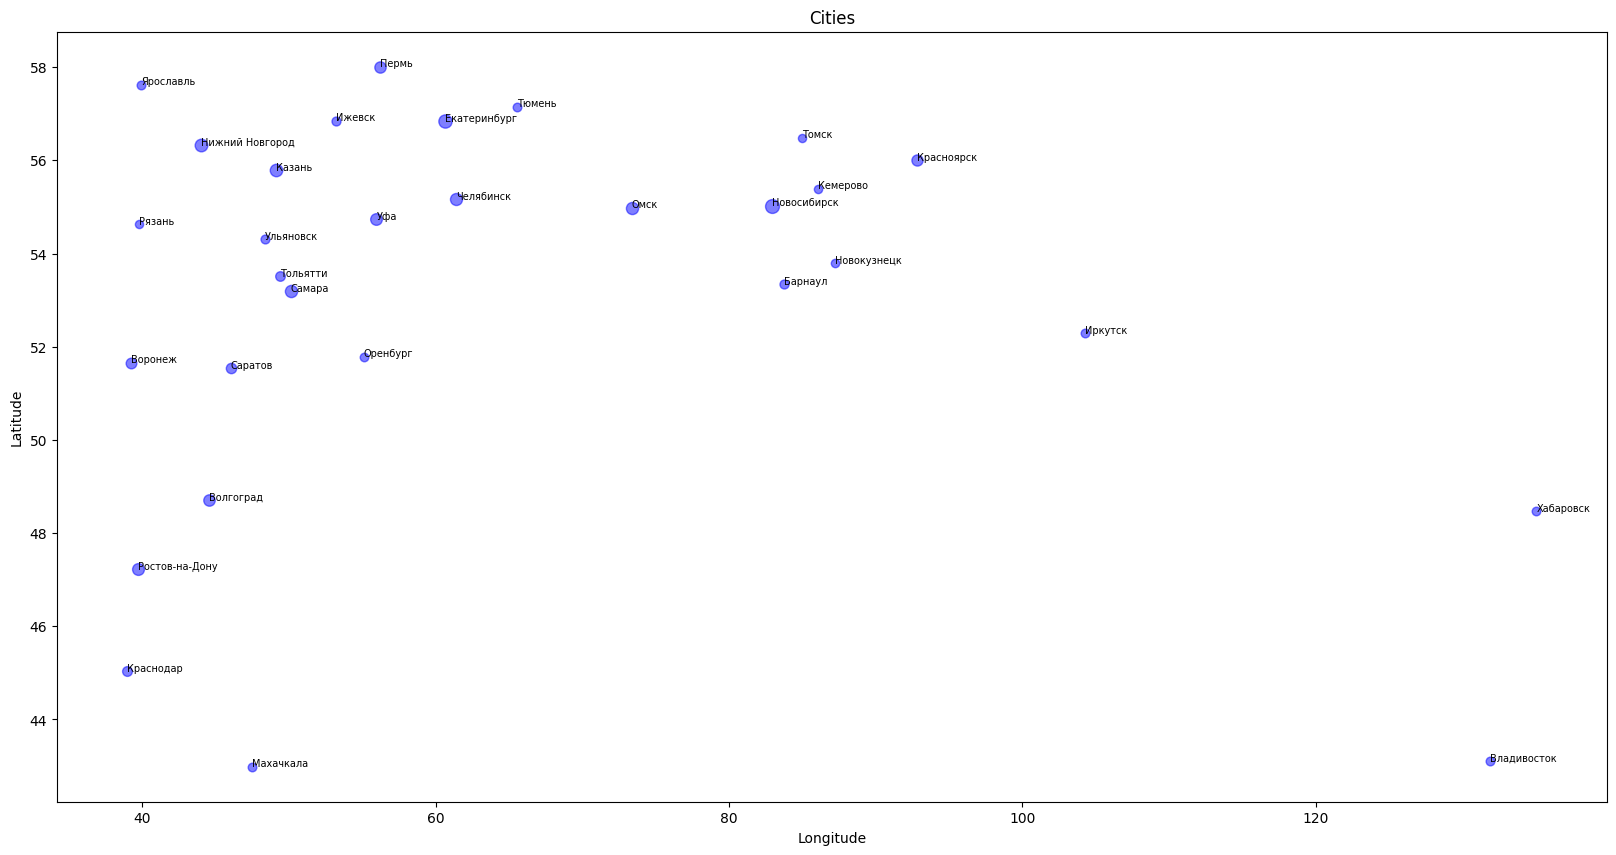

In [12]:
plt.figure(figsize=(20, 10))
plot_cities(cities)
plt.savefig('cities.png')

In [13]:
def distance(city1: pd.Series, city2: pd.Series) -> float:
    """Haversine formula"""

    lon1, lat1 = city1['geo_lon'], city1['geo_lat']
    lon2, lat2 = city2['geo_lon'], city2['geo_lat']

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers
    R = 6371
    return R * c

In [14]:
def total_distance(cities: pd.DataFrame, path: np.ndarray) -> float:
    return sum(distance(cities.loc[path[i]], cities.loc[path[i+1]]) for i in range(0, len(path)-1))

### Plot random path

In [15]:
path = np.arange(N)
np.random.shuffle(path)

In [16]:
def plot_path(cities: pd.DataFrame, path: np.ndarray):
    plot_cities(cities)
    for i in range (0, len(path)-1):
        city1 = cities.loc[path[i]]
        x1, y1 = city1['geo_lon'], city1['geo_lat']
        
        city2 = cities.loc[path[i+1]]
        x2, y2 = city2['geo_lon'], city2['geo_lat']
        
        plt.plot([x1, x2], [y1, y2], c='red', alpha=0.5, linewidth=0.6)

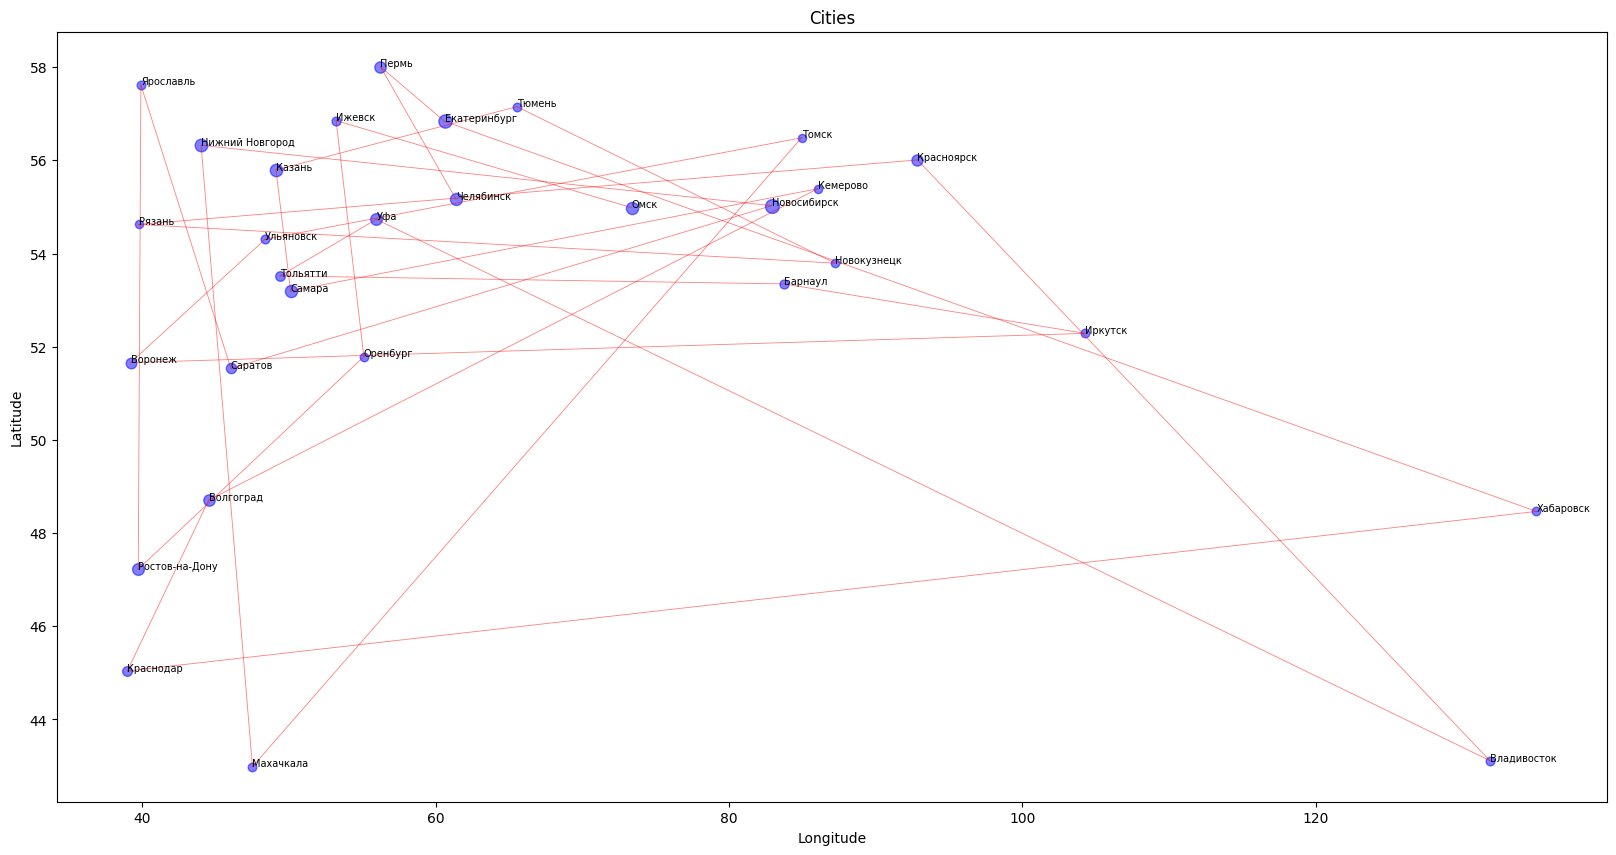

In [17]:
plt.figure(figsize=(20, 10))
plot_path(cities, path)
plt.savefig('path.png')

## Simulated Annealing implementation

In [18]:
def simulated_annealing(
    initial_path: np.ndarray,
    initial_temperature: float,
    minimal_temperature: float,
    cooling_rate: float
):  
    t = 0
    
    curr_path = initial_path
    curr_distance = total_distance(cities, curr_path)
    best_path = curr_path.copy()
    best_distance = curr_distance
    curr_temperature = initial_temperature

    paths = [curr_path]
    distances = [curr_distance]
    temperatures = [curr_temperature]

    while curr_temperature > minimal_temperature:
        t += 1
        
        ind1 = 0
        ind2 = 0
        while ind1 == ind2:
            ind1 = np.random.randint(0, N-1)
            ind2 = np.random.randint(0, N-1)

        new_path = curr_path.copy()
        new_path[ind1], new_path[ind2] = new_path[ind2], new_path[ind1]
        new_distance = total_distance(cities, new_path)
        delta_distance = new_distance - curr_distance

        if delta_distance < 0 or np.random.uniform(0, 1) < np.exp(-delta_distance / curr_temperature):
            curr_path = new_path.copy()
            curr_distance = new_distance
            if curr_distance < best_distance:
                best_path = curr_path.copy()
                best_distance = curr_distance

        paths.append(curr_path)
        distances.append(curr_distance)        
        temperatures.append(curr_temperature)

        curr_temperature *= cooling_rate

    return best_path, best_distance, paths, distances, temperatures

### Fast cooling

In [19]:
cooling_rate = 0.9

#### Plot convergence

In [20]:
path = np.arange(N)
np.random.shuffle(path)

best_path, best_distance, paths, distances, temperatues = simulated_annealing(
    initial_path=path,
    initial_temperature=5000,
    minimal_temperature=1,
    cooling_rate=cooling_rate
)

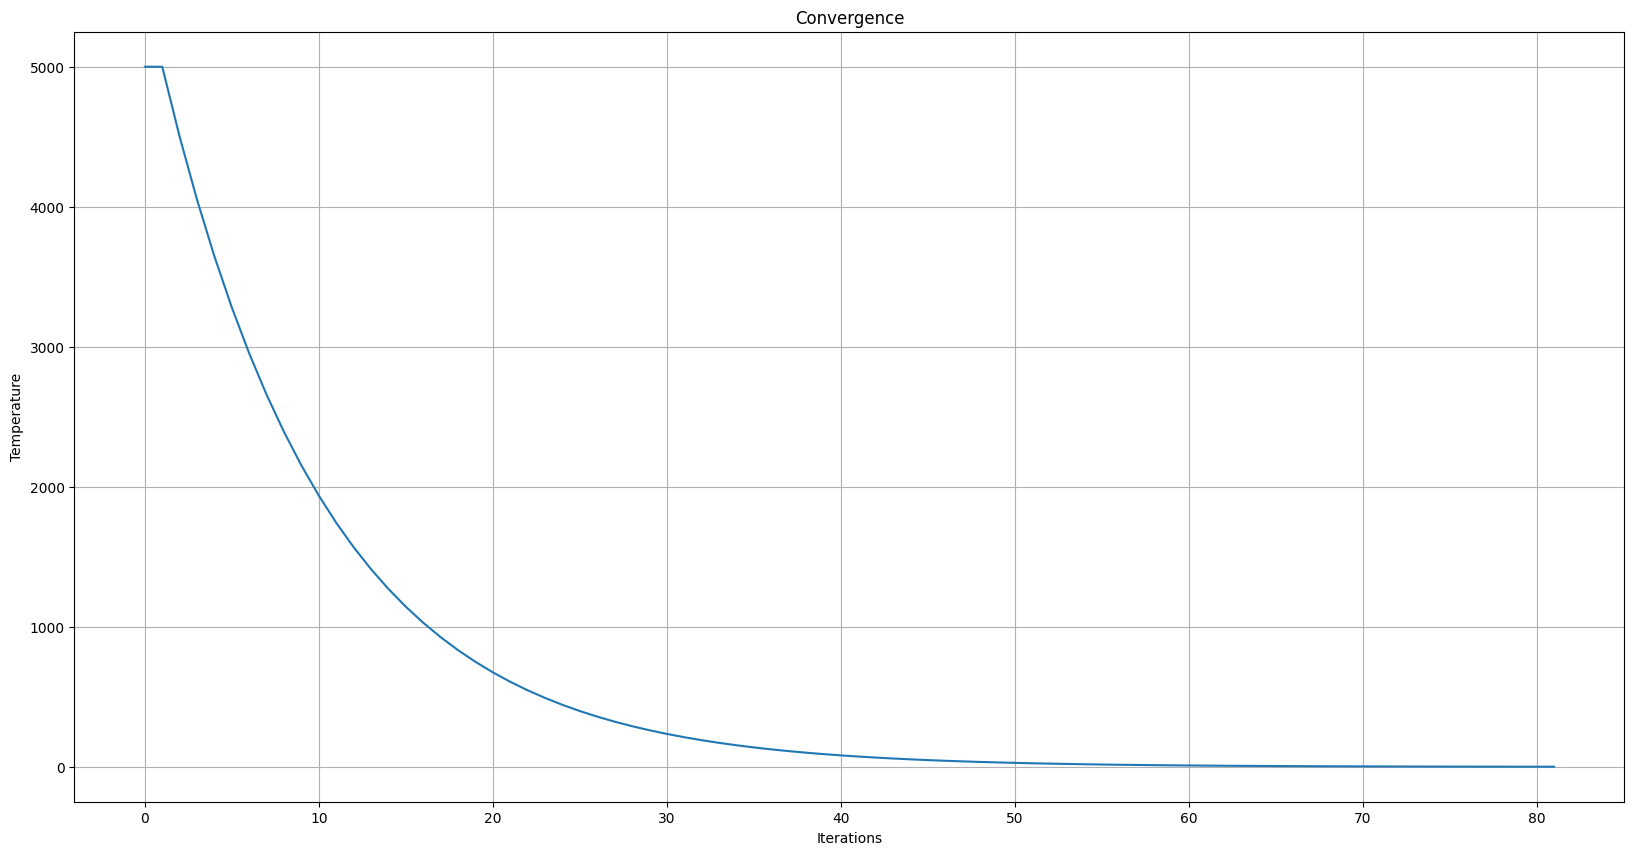

In [21]:
plt.figure(figsize=(20, 10))
plt.title('Convergence')
plt.plot(np.arange(len(temperatues)), temperatues)
plt.xlabel('Iterations')
plt.ylabel('Temperature')
plt.grid()
plt.savefig('fast-cooling-temperature-convergence.png')

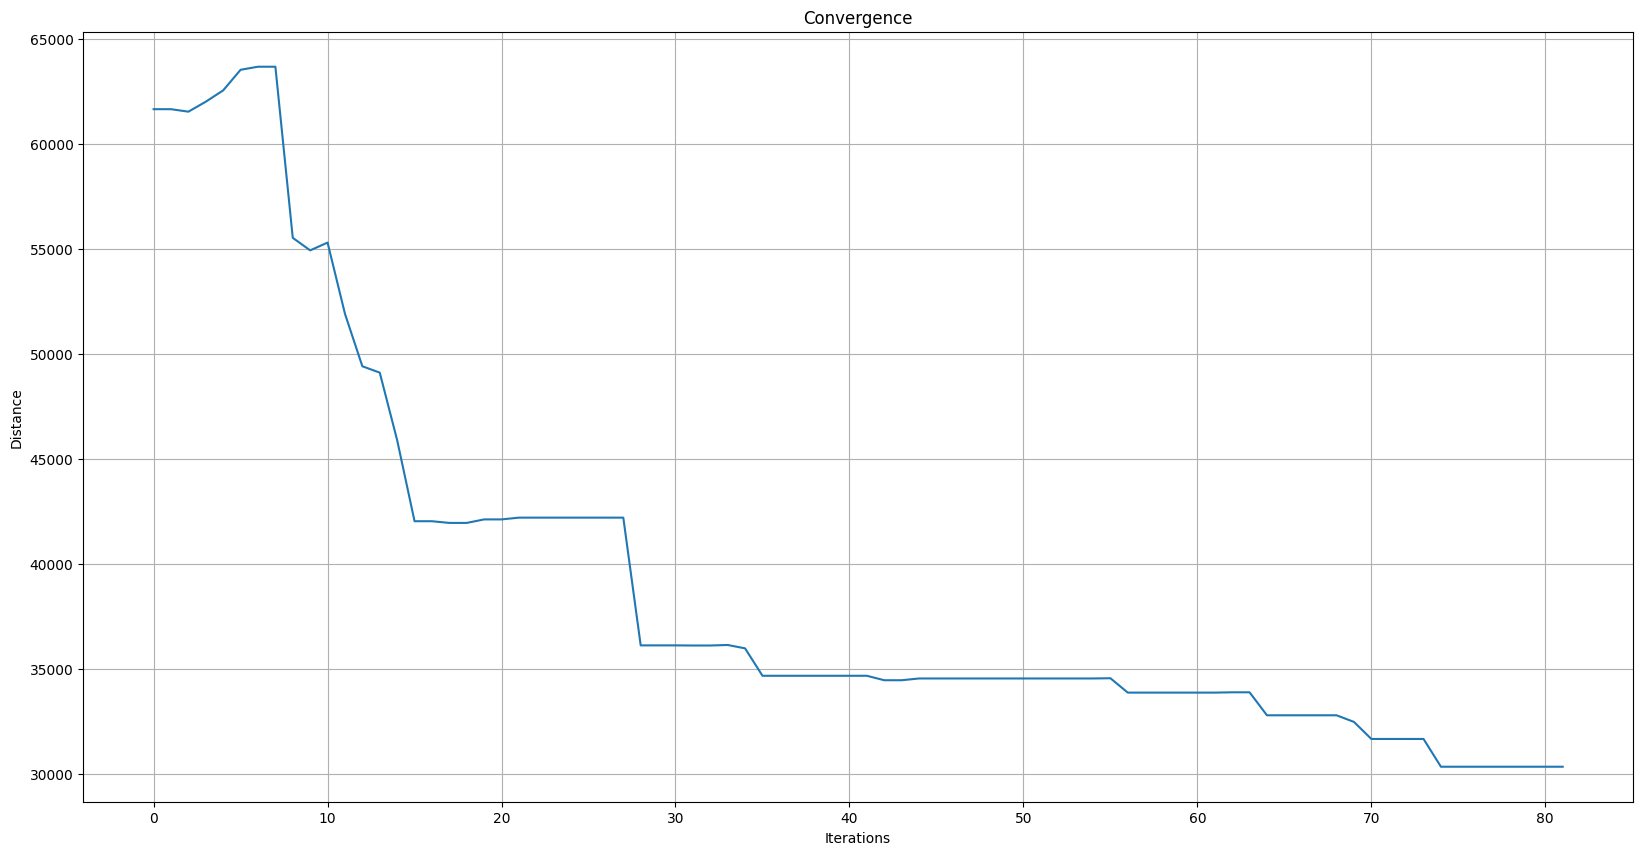

In [22]:
plt.figure(figsize=(20, 10))
plt.title('Convergence')
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.grid()
plt.savefig('fast-cooling-distance-convergence.png')

#### Animation

In [23]:
path = np.arange(N)
np.random.shuffle(path)

best_path, best_distance, paths, distances, temperatures = simulated_annealing(
    initial_path=path,
    initial_temperature=5000,
    minimal_temperature=1,
    cooling_rate=cooling_rate
)

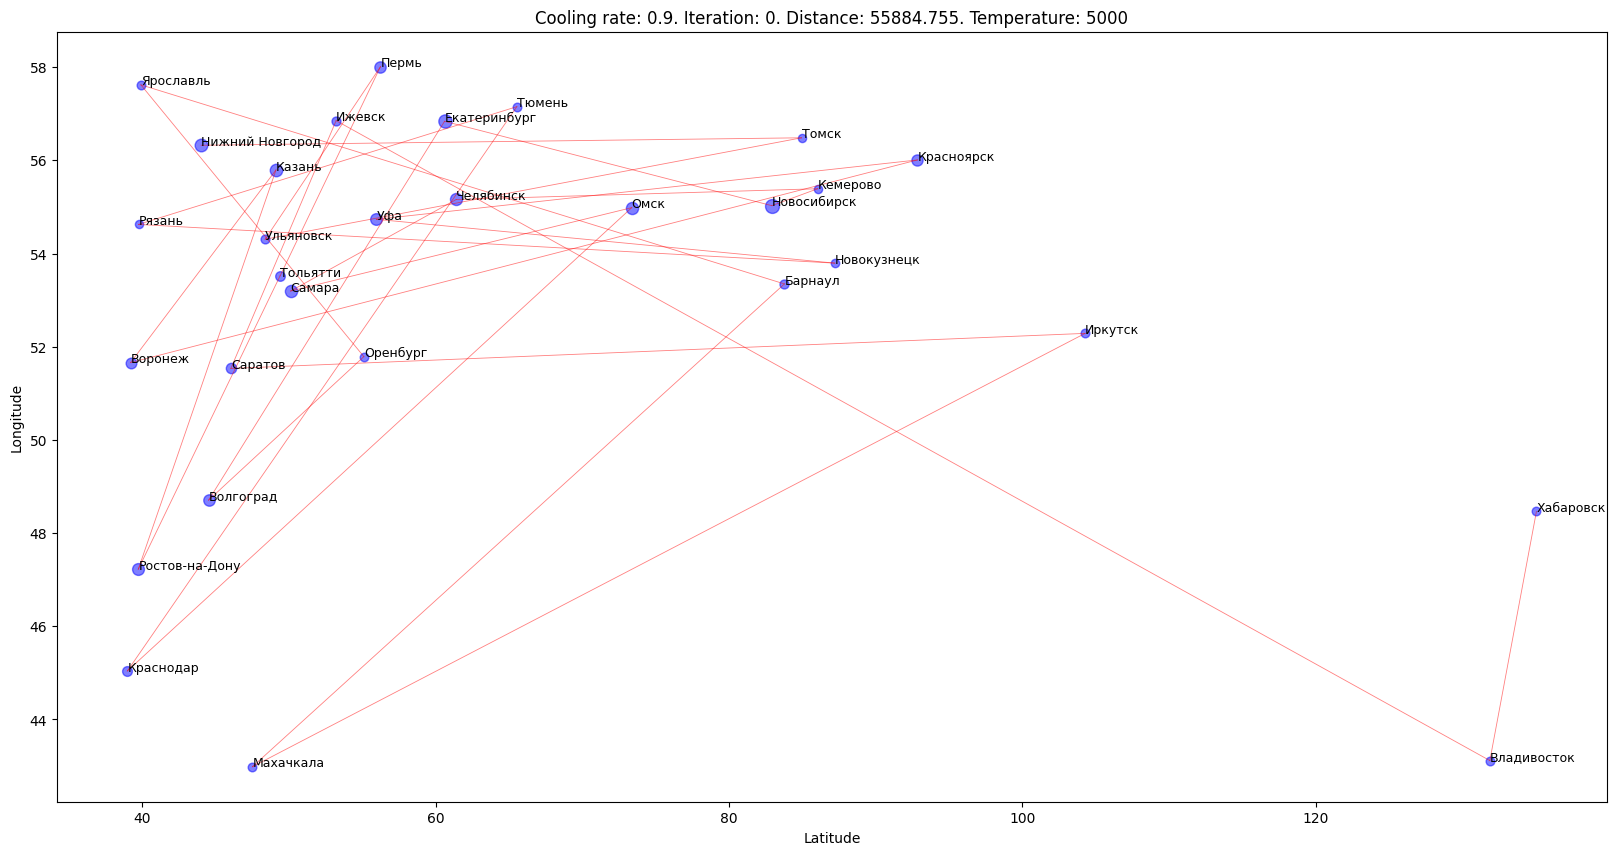

In [24]:
import time
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots(figsize=(20, 10))


def update(iteration: int):
    ax.clear()

    for _, city in cities.iterrows():
        x = city['geo_lon']
        y = city['geo_lat']

        ax.scatter(x, y, c='blue', alpha=0.5, s=compute_marker_size(city['population']))
        ax.annotate(city['city'], xy=(x, y), size=9)

    path = paths[iteration]
    distance = distances[iteration]
    temperature = temperatures[iteration]

    for i in range (0, len(path)-1):
        city1 = cities.loc[path[i]]
        x1, y1 = city1['geo_lon'], city1['geo_lat']

        city2 = cities.loc[path[i+1]]
        x2, y2 = city2['geo_lon'], city2['geo_lat']
        
        ax.plot([x1, x2], [y1, y2], c='red', alpha=0.5, linewidth=0.6)

    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title(f'Cooling rate: {cooling_rate}. Iteration: {iteration}. Distance: {round(distance, 3)}. Temperature: {temperature}')

anim = FuncAnimation(fig, update, frames=range(0, len(paths)), interval=250)
anim.save('fast-cooling.mp4')

### Middle cooling

In [25]:
cooling_rate = 0.95

#### Plot convergence

In [26]:
path = np.arange(N)
np.random.shuffle(path)

best_path, best_distance, paths, distances, temperatues = simulated_annealing(
    initial_path=path,
    initial_temperature=5000,
    minimal_temperature=1,
    cooling_rate=cooling_rate
)

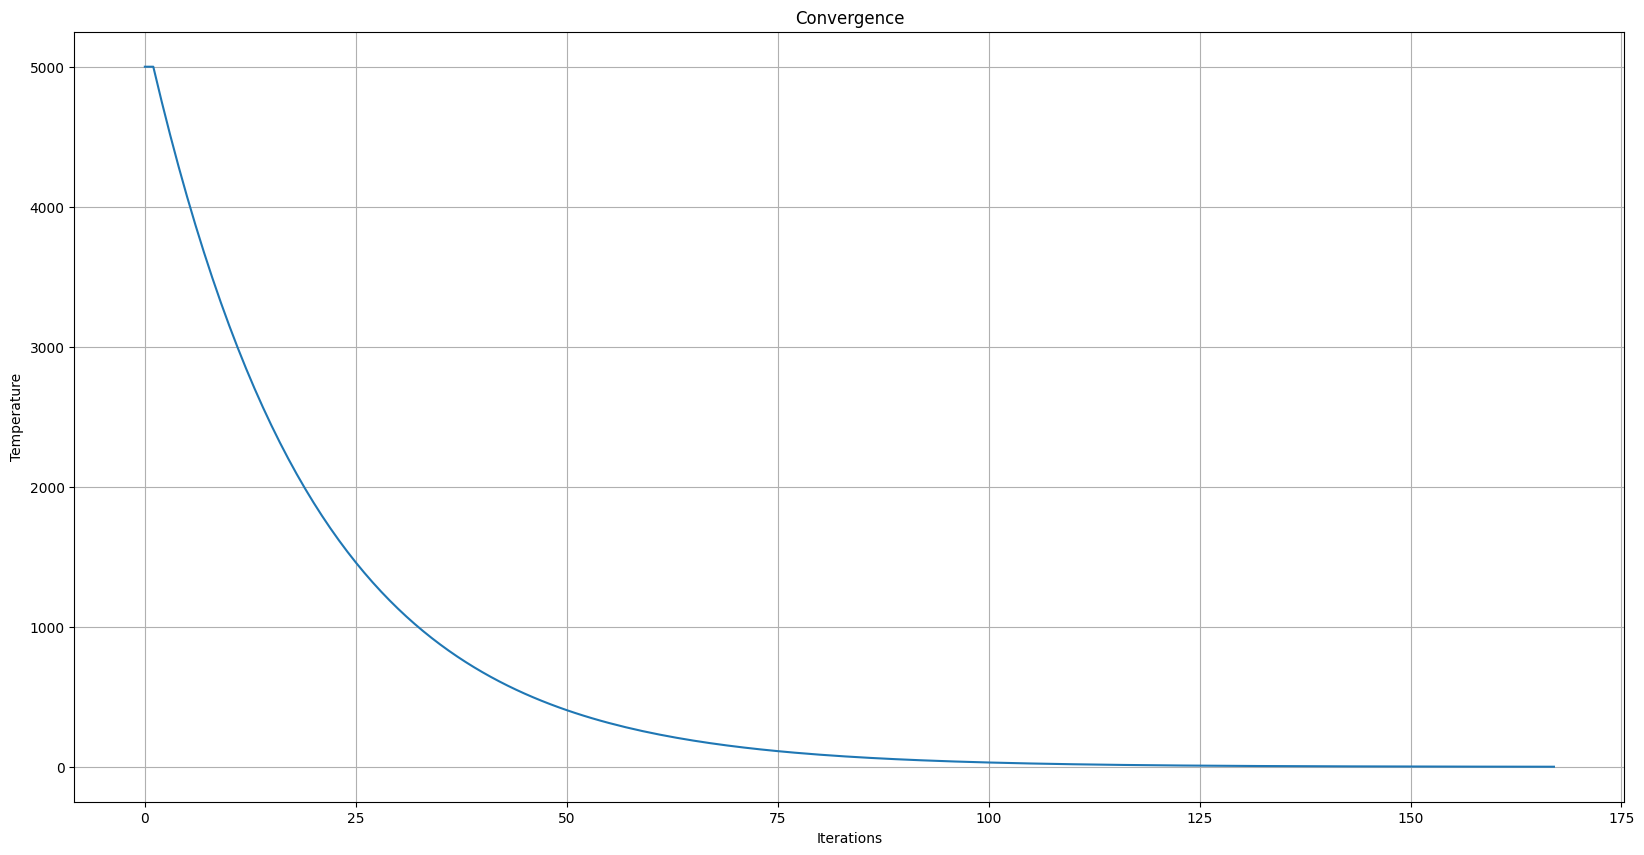

In [27]:
plt.figure(figsize=(20, 10))
plt.title('Convergence')
plt.plot(np.arange(len(temperatues)), temperatues)
plt.xlabel('Iterations')
plt.ylabel('Temperature')
plt.grid()
plt.savefig('middle-cooling-temperature-convergence.png')

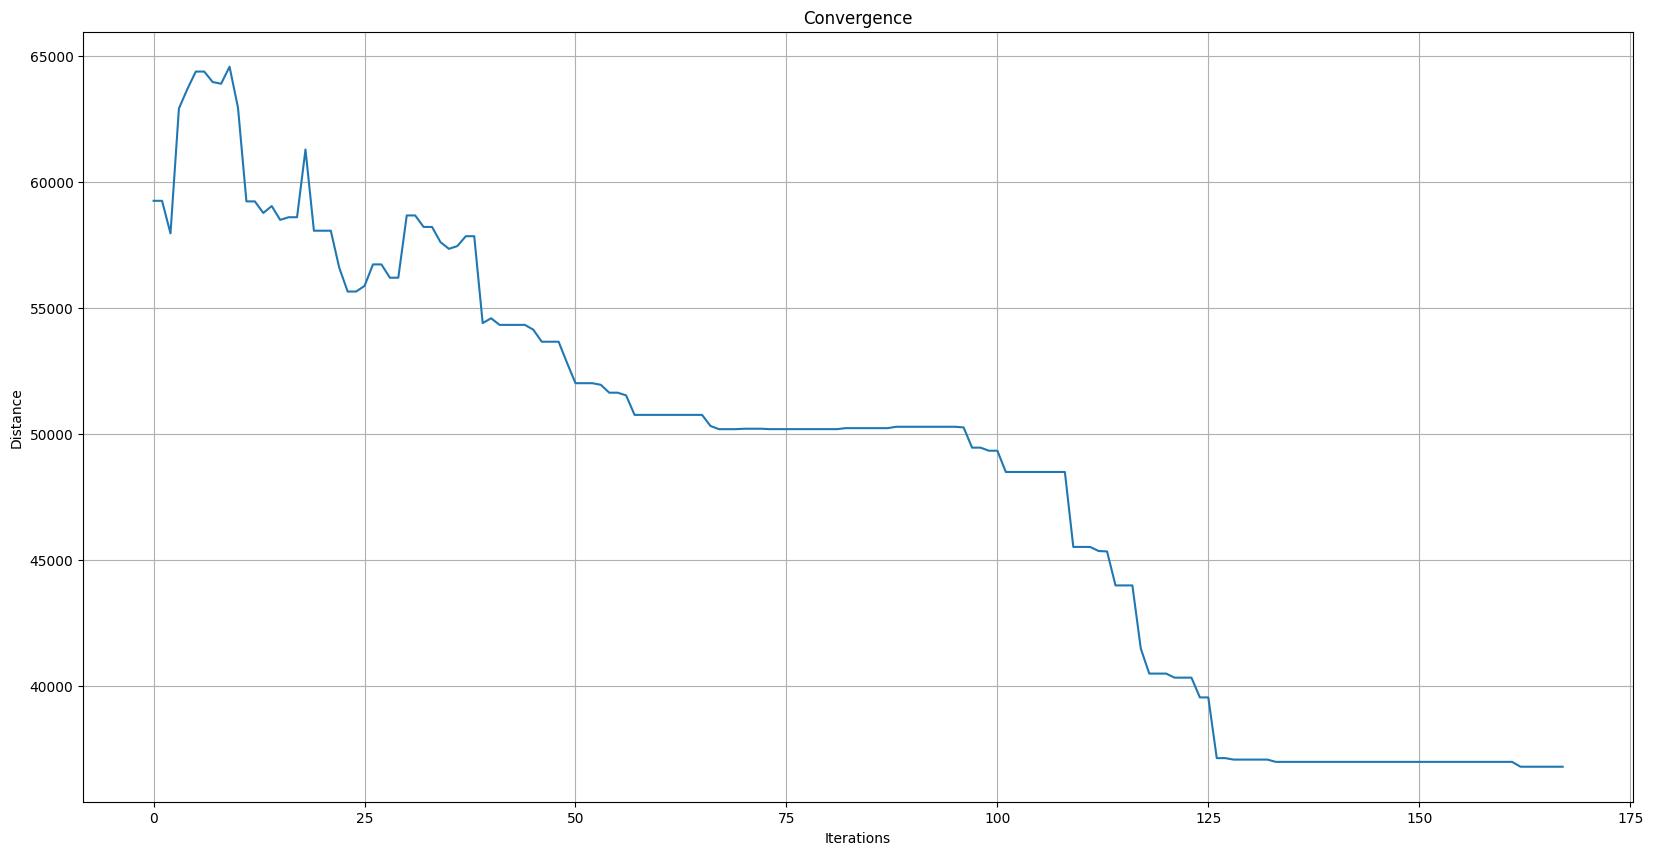

In [28]:
plt.figure(figsize=(20, 10))
plt.title('Convergence')
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.grid()
plt.savefig('middle-cooling-distance-convergence.png')

#### Animation

In [29]:
path = np.arange(N)
np.random.shuffle(path)

best_path, best_distance, paths, distances, temperatures = simulated_annealing(
    initial_path=path,
    initial_temperature=5000,
    minimal_temperature=1,
    cooling_rate=cooling_rate
)

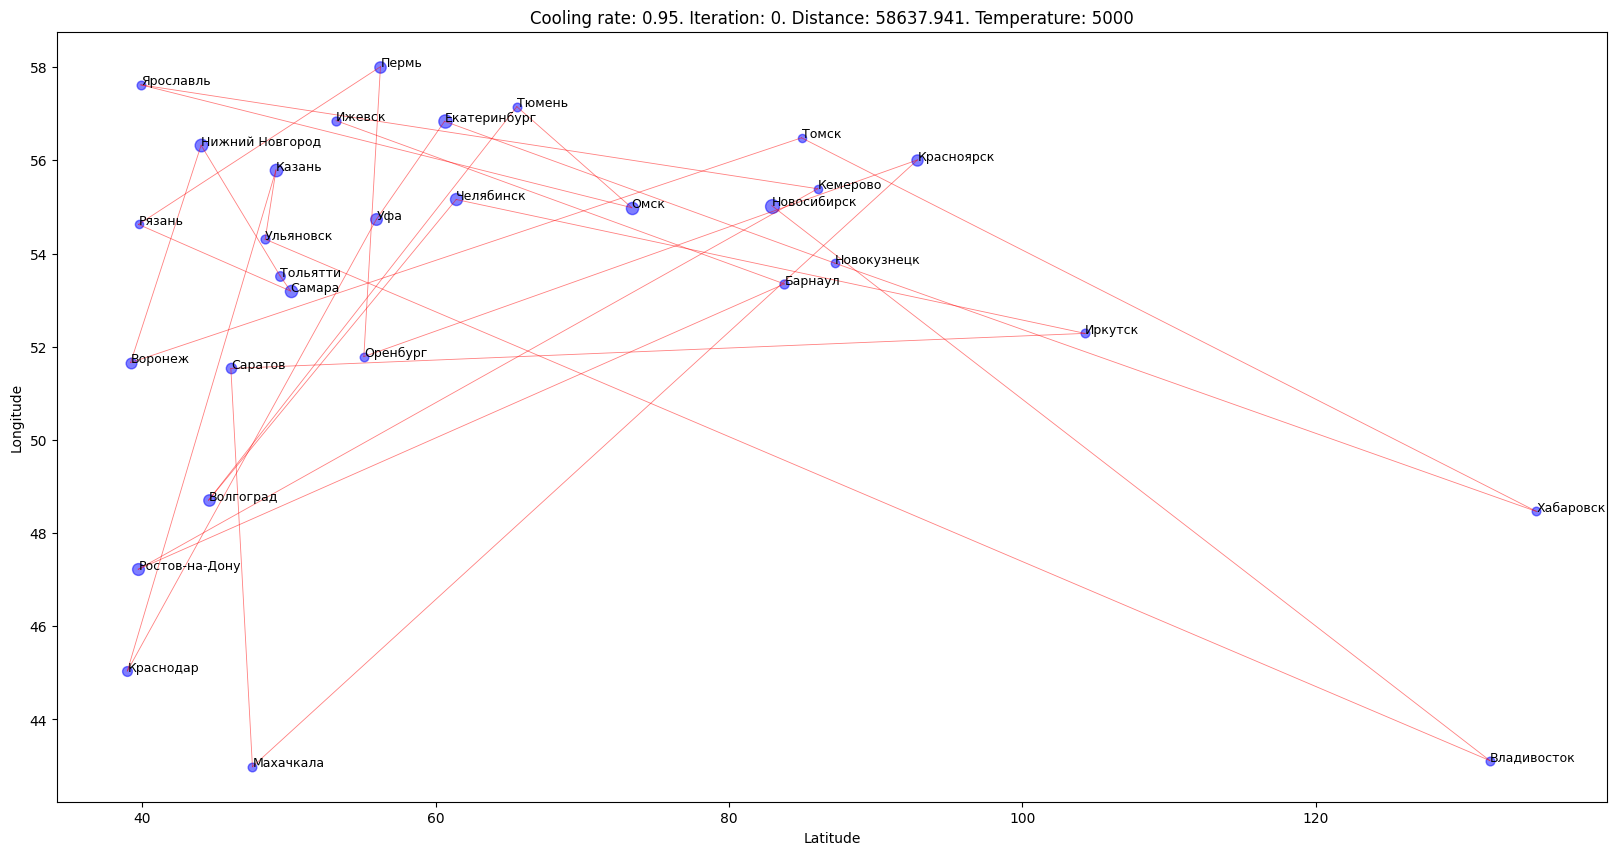

In [30]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots(figsize=(20, 10))


def update(iteration: int):
    ax.clear()

    for _, city in cities.iterrows():
        x = city['geo_lon']
        y = city['geo_lat']

        ax.scatter(x, y, c='blue', alpha=0.5, s=compute_marker_size(city['population']))
        ax.annotate(city['city'], xy=(x, y), size=9)

    path = paths[iteration]
    distance = distances[iteration]
    temperature = temperatures[iteration]

    for i in range (0, len(path)-1):
        city1 = cities.loc[path[i]]
        x1, y1 = city1['geo_lon'], city1['geo_lat']

        city2 = cities.loc[path[i+1]]
        x2, y2 = city2['geo_lon'], city2['geo_lat']
        
        ax.plot([x1, x2], [y1, y2], c='red', alpha=0.5, linewidth=0.6)

    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title(f'Cooling rate: {cooling_rate}. Iteration: {iteration}. Distance: {round(distance, 3)}. Temperature: {temperature}')

anim = FuncAnimation(fig, update, frames=range(0, len(paths)), interval=250)
anim.save('middle-cooling.mp4')

### Slow cooling

In [31]:
cooling_rate = 0.99

#### Plot convergence

In [32]:
path = np.arange(N)
np.random.shuffle(path)

best_path, best_distance, paths, distances, temperatues = simulated_annealing(
    initial_path=path,
    initial_temperature=5000,
    minimal_temperature=1,
    cooling_rate=cooling_rate
)

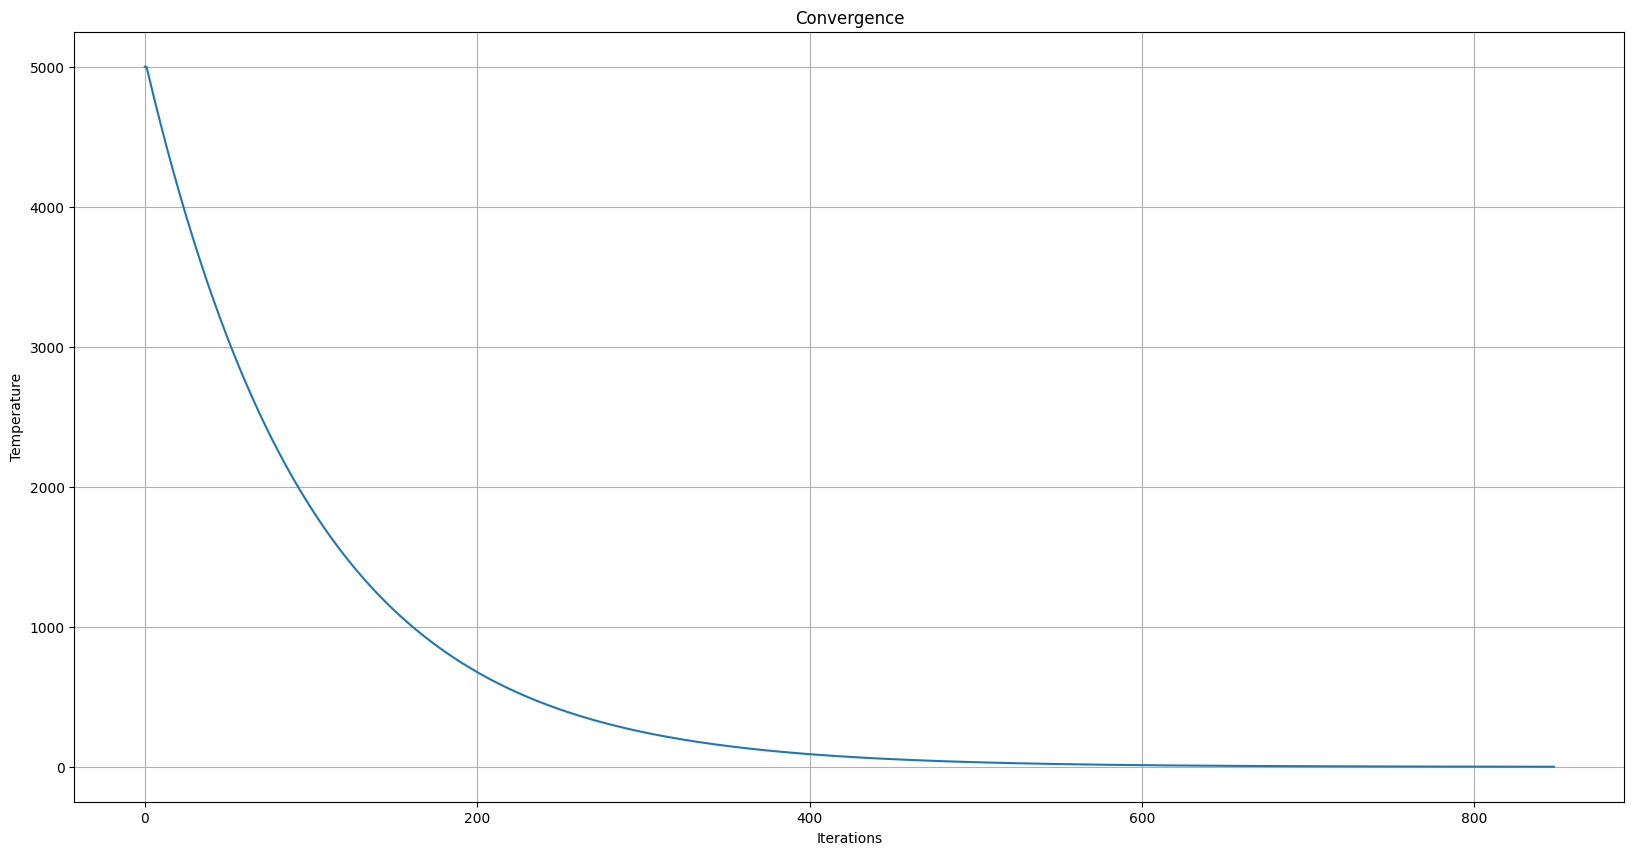

In [33]:
plt.figure(figsize=(20, 10))
plt.title('Convergence')
plt.plot(np.arange(len(temperatues)), temperatues)
plt.xlabel('Iterations')
plt.ylabel('Temperature')
plt.grid()
plt.savefig('slow-cooling-temperature-convergence.png')

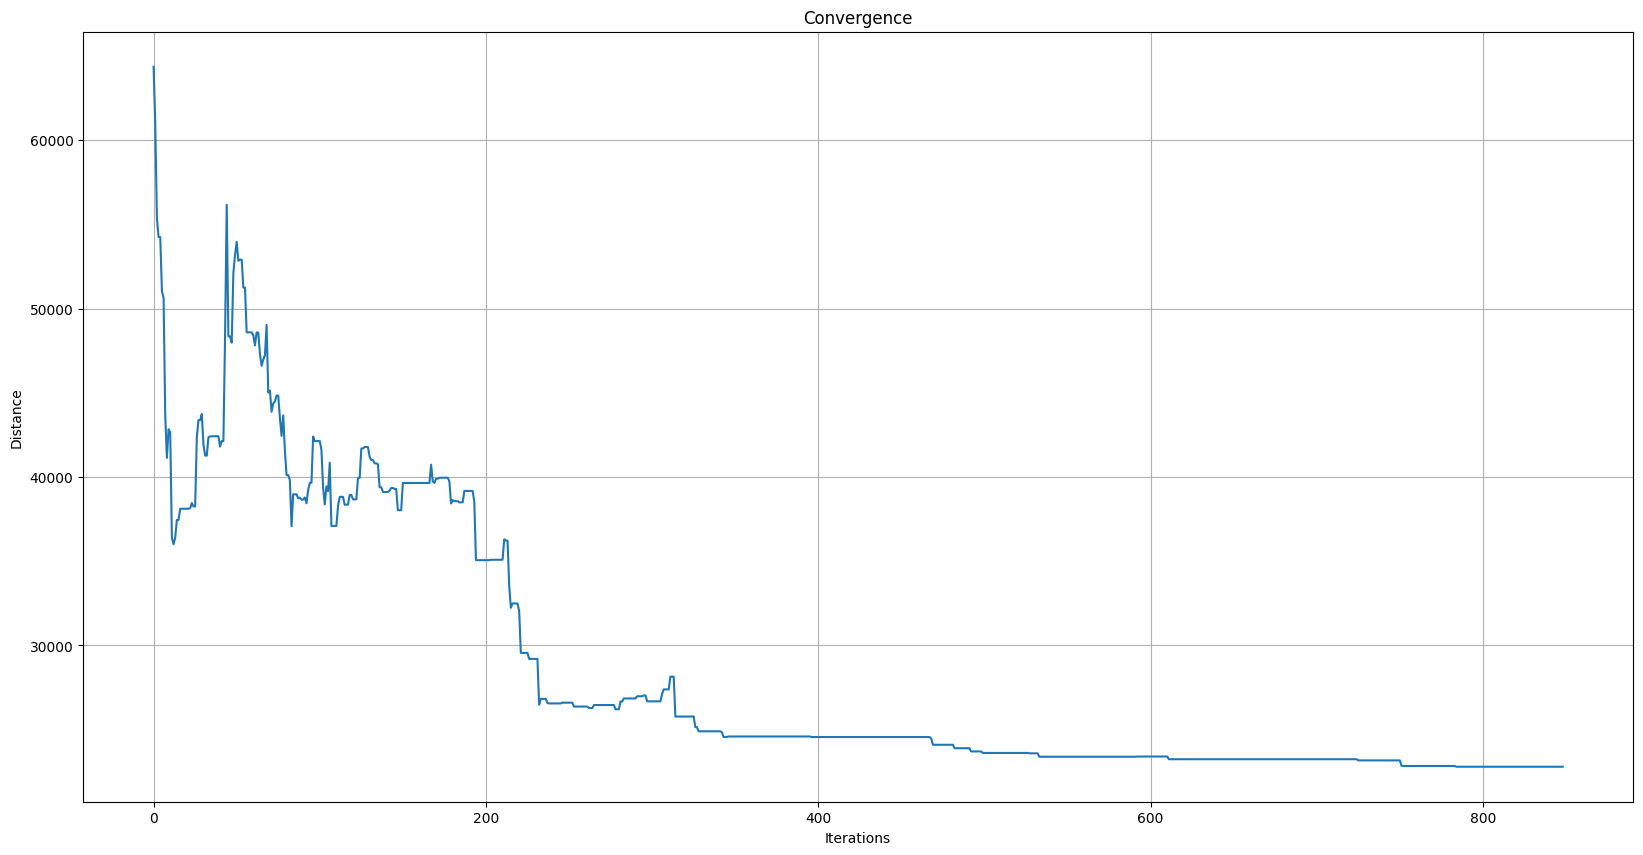

In [34]:
plt.figure(figsize=(20, 10))
plt.title('Convergence')
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.grid()
plt.savefig('slow-cooling-distance-convergence.png')

#### Animation

In [35]:
path = np.arange(N)
np.random.shuffle(path)

best_path, best_distance, paths, distances, temperatures = simulated_annealing(
    initial_path=path,
    initial_temperature=5000,
    minimal_temperature=1,
    cooling_rate=cooling_rate
)

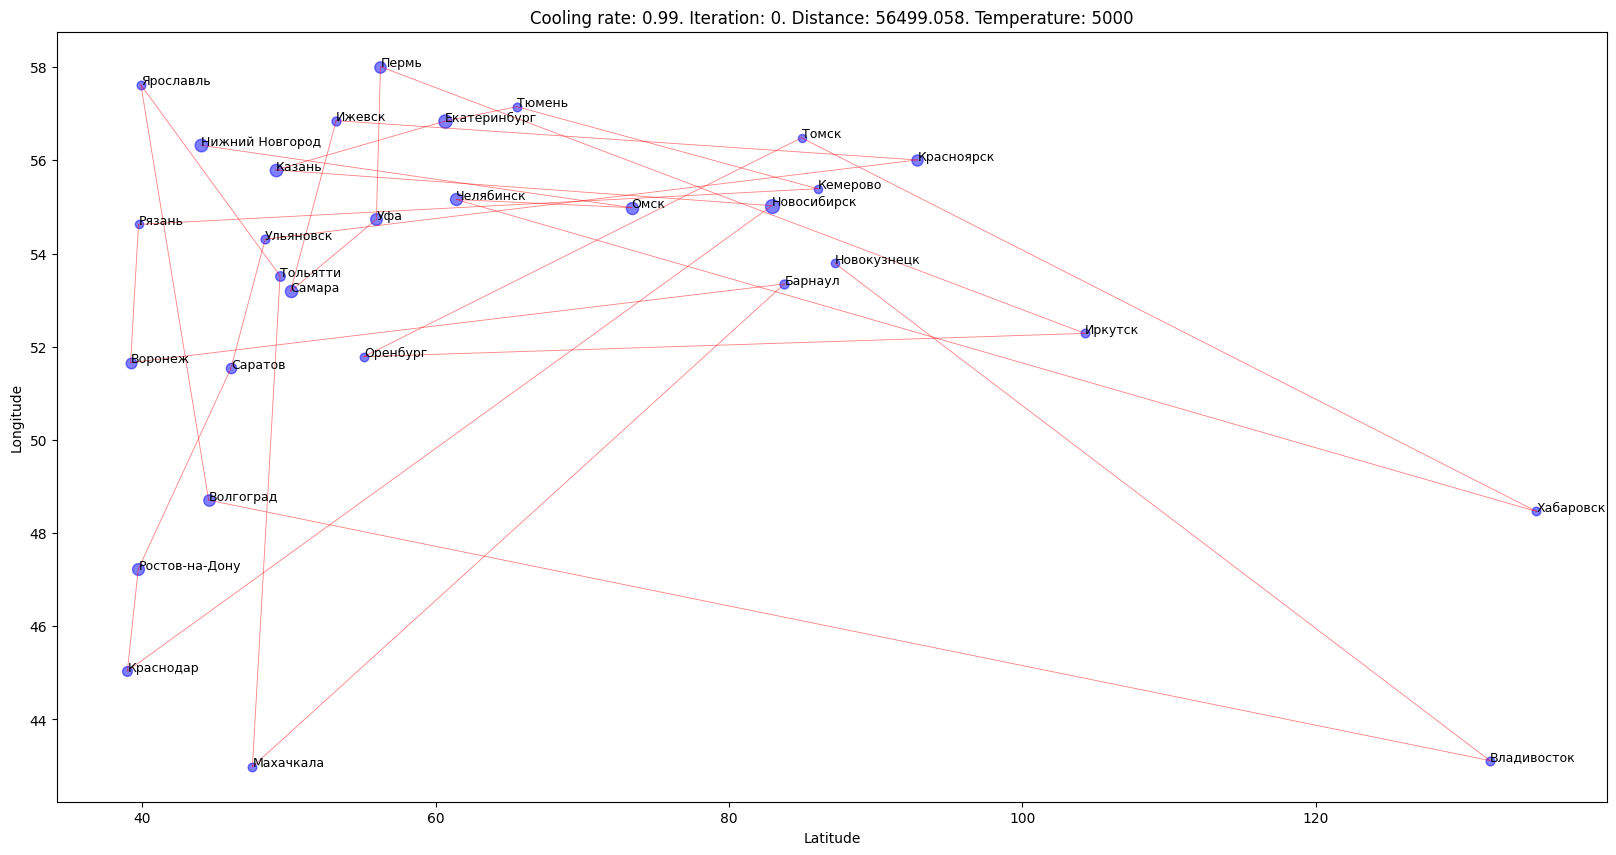

In [36]:
import time
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots(figsize=(20, 10))


def update(iteration: int):
    ax.clear()

    for _, city in cities.iterrows():
        x = city['geo_lon']
        y = city['geo_lat']

        ax.scatter(x, y, c='blue', alpha=0.5, s=compute_marker_size(city['population']))
        ax.annotate(city['city'], xy=(x, y), size=9)

    path = paths[iteration]
    distance = distances[iteration]
    temperature = temperatures[iteration]

    for i in range (0, len(path)-1):
        city1 = cities.loc[path[i]]
        x1, y1 = city1['geo_lon'], city1['geo_lat']

        city2 = cities.loc[path[i+1]]
        x2, y2 = city2['geo_lon'], city2['geo_lat']
        
        ax.plot([x1, x2], [y1, y2], c='red', alpha=0.5, linewidth=0.6)

    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title(f'Cooling rate: {cooling_rate}. Iteration: {iteration}. Distance: {round(distance, 3)}. Temperature: {temperature}')

anim = FuncAnimation(fig, update, frames=range(0, len(paths)), interval=250)
anim.save('slow-cooling.mp4')